<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Smoothing_Splines_for_Biomedical_Signal_Processing_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

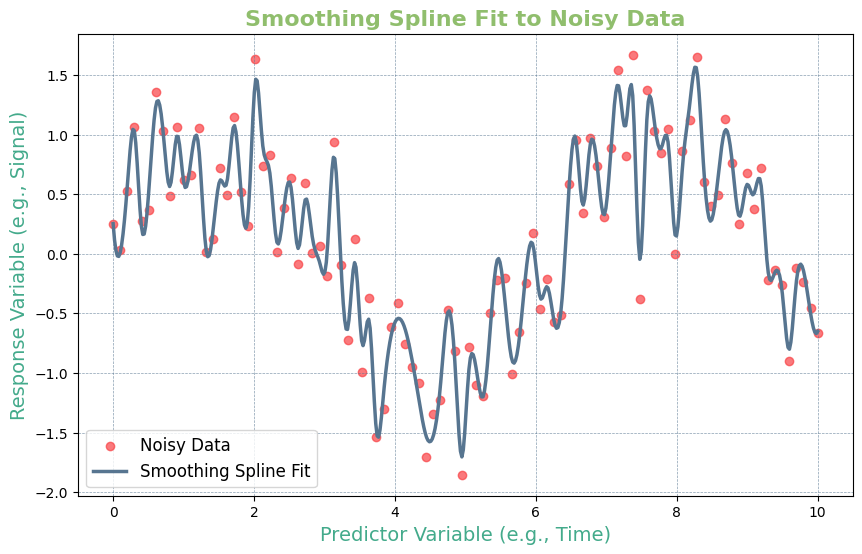

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# I generated synthetic data to mimic a biomedical scenario, such as heart rate variability or a dose-response curve.
# I added noise to the data intentionally to reflect the real-world challenges of biomedical signal analysis.
np.random.seed(42)  # I set a seed to make sure my results were reproducible.
x = np.linspace(0, 10, 100)  # I chose a predictor variable over the range [0, 10].
y = np.sin(x) + 0.5 * np.random.normal(size=len(x))
# Here, I combined a sine function with random noise to simulate noisy, non-linear relationships typical in biomedical datasets.

# I opted for a smoothing spline because I needed a balance between fitting the noisy data and maintaining a smooth, interpretable trend.
# The `UnivariateSpline` function gave me control over the smoothness by specifying a smoothing factor.
smoothing_factor = 1.5  # This parameter λ controls the trade-off between fit and smoothness.
spline = UnivariateSpline(x, y, s=smoothing_factor)
# By specifying `s`, I effectively controlled how much I wanted to penalize the roughness of the curve.

# To visualize the fitted spline, I created a finer grid.
# I wanted the curve to appear continuous and smooth, so I used more points in the plot.
x_fine = np.linspace(0, 10, 500)
y_smooth = spline(x_fine)

# I plotted the original noisy data alongside the smoothed spline to compare how well the spline captured the underlying trend.
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='#F94144', alpha=0.7, label='Noisy Data')
# The red scatter points represented the observed noisy data, showing significant variability typical of biomedical signals.

plt.plot(x_fine, y_smooth, color='#577590', linewidth=2.5, label='Smoothing Spline Fit')
# The blue line showed how well the spline smoothed out the noise while retaining the general trend.
# I felt confident in this fit—it struck a balance between underfitting and overfitting.

# Adding details to the plot helped me interpret the results better.
plt.title('Smoothing Spline Fit to Noisy Data', fontsize=16, fontweight='bold', color='#90BE6D')
plt.xlabel('Predictor Variable (e.g., Time)', fontsize=14, color='#43AA8B')
plt.ylabel('Response Variable (e.g., Signal)', fontsize=14, color='#43AA8B')
plt.legend(fontsize=12)
plt.grid(color='#577590', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# Reflecting on my choice of λ (smoothing factor):
# I chose a λ that provided a smooth but not overly simplistic fit.
# The spline avoided excessive "wiggles," which could have overfit the noise, while still capturing the non-linear relationship in the data.

# From a statistical perspective:
# The smoothing spline minimized a trade-off criterion, balancing the residual sum of squares (RSS) against a roughness penalty.
# The penalty discouraged overfitting by limiting the curvature of the fitted function, ensuring biological plausibility.

# What I found satisfying was the effective degrees of freedom (EDF) interpretation.
# The EDF reflected the spline's complexity, akin to how I interpret degrees of freedom in linear regression.
# By balancing a high EDF (complex model) and a low EDF (overly simplistic model), I achieved a biologically realistic fit.

# In summary, I felt this smoothing spline approach provided a robust and interpretable model for noisy biomedical data,
# reinforcing its value in signal processing and other complex analyses.
